## Procesamiento del Lenguaje Natural (PLN)


El PLN es una rama de la inteligencia artificial que se enfoca en la interacción entre las computadoras y el lenguaje humano. Su objetivo es permitir que las máquinas comprendan, interpreten y generen lenguaje de manera que sea útil para los seres humanos. El PLN abarca varias tareas y técnicas que incluyen:

- Análisis sintáctico y semántico: El análisis sintáctico implica descomponer una oración en sus componentes gramaticales para entender su estructura, mientras que el semántico se enfoca en el significado de las palabras y las relaciones entre ellas.

- Tokenización: Consiste en dividir un texto en unidades más pequeñas, como palabras o frases, que se pueden procesar más fácilmente.

- Etiquetado de partes del discurso (POS tagging): Asigna categorías gramaticales (sustantivo, verbo, adjetivo, etc.) a cada palabra en una oración.

- Análisis de sentimientos: Determina la actitud emocional detrás de un texto, ya sea positivo, negativo o neutral.

- Traducción automática: Permite traducir texto de un idioma a otro utilizando algoritmos de PLN.

- Reconocimiento de entidades nombradas (NER): Identifica y clasifica entidades relevantes en un texto, como nombres de personas, lugares y fechas.

- Generación de texto: El PLN también se utiliza para crear texto coherente y relevante, como en la generación automática de resúmenes o respuestas a preguntas.

El PLN depende de técnicas como el aprendizaje automático, redes neuronales y modelos de lenguaje para mejorar la precisión de estas tareas, y es fundamental en aplicaciones como chatbots, asistentes virtuales, motores de búsqueda y sistemas de recomendación. Sin embargo, a pesar de sus avances, sigue siendo un campo desafiante debido a la ambigüedad, complejidad y diversidad del lenguaje humano.

In [1]:
pip install nltk

In [104]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### SMS Spam Collection Dataset
Collection of SMS messages tagged as spam or legitimate

About Dataset
Context
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Content
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link].
-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link].
-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link].
-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches:

Acknowledgements
The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

Inspiration
Can you use this dataset to build a prediction model that will accurately classify which texts are spam?

In [111]:
import nltk
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
file_path = "sample_data/spam.csv"
if os.path.exists(file_path):
    mensajes = [line.rstrip() for line in open(file_path, "r", encoding="ISO-8859-1")]
else:
    print(f"El archivo {file_path} no existe.")


In [76]:
mensajes[1]

'ham,Ok lar... Joking wif u oni...'

In [77]:
for mensaje in enumerate(mensajes[:5]):
    print(mensaje)

(0, 'ï»¿ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."')
(1, 'ham,Ok lar... Joking wif u oni...')
(2, "spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")
(3, 'ham,U dun say so early hor... U c already then say...')
(4, 'ham,"Nah I don\'t think he goes to usf, he lives around here though"')


In [78]:
mensajes_df = pd.read_csv(file_path, sep=",", header=None, names=["etiqueta", "mensaje"])

In [79]:
mensajes_df.head()

,etiqueta,mensaje
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
mensajes_df['longitud'] = mensajes_df['mensaje'].apply(len)

<Axes: ylabel='Frequency'>

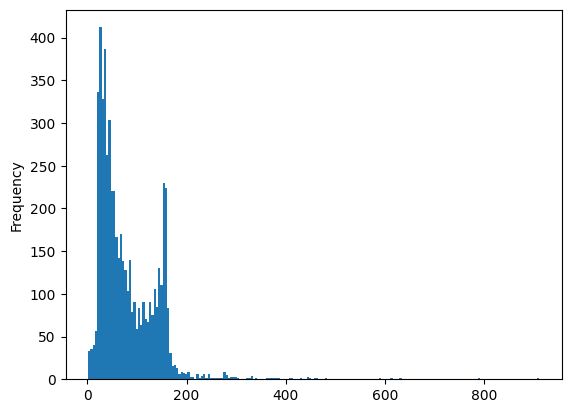

In [82]:
mensajes_df.longitud.plot.hist(bins=200)

In [83]:
mensajes_df.longitud.describe()

,longitud
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [85]:
mensajes_df[mensajes_df.longitud == 910]['mensaje'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

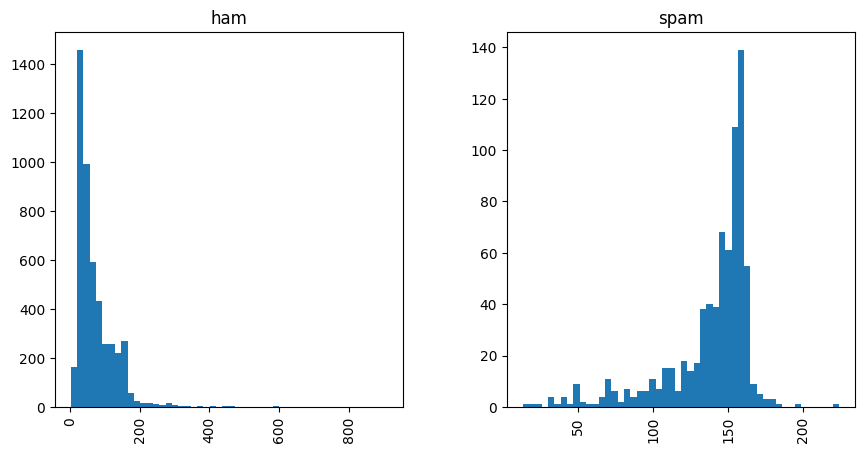

In [88]:
mensajes_df.hist(column='longitud', by='etiqueta', bins=50, figsize=(10,5))

## Procesamiento de texto

In [96]:
cadena = "Hola, cómo estás, desde hoy no pasa datos el algoritmo?"
cadena

'Hola, cómo estás, desde hoy no pasa datos el algoritmo?'

In [92]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [99]:
sin_puntuacion = [char for char in cadena if char not in string.punctuation]

sin_puntuacion = ''.join(sin_puntuacion)
sin_puntuacion

'Hola cómo estás desde hoy no pasa datos el algoritmo'

In [100]:
palabras = sin_puntuacion.split()
palabras

['Hola',
 'cómo',
 'estás',
 'desde',
 'hoy',
 'no',
 'pasa',
 'datos',
 'el',
 'algoritmo']

In [106]:
cadena_limpia = [palabra for palabra in palabras if palabra.lower() not in stopwords.words('spanish')]
cadena_limpia

['Hola', 'cómo', 'hoy', 'pasa', 'datos', 'algoritmo']

In [137]:
def procesar_texto(texto):
    sin_puntuacion = [char for char in texto if char not in string.punctuation]
    sin_puntuacion = ''.join(sin_puntuacion)
    palabras = sin_puntuacion.split()
    cadena_limpia = [palabra for palabra in palabras if palabra.lower() not in stopwords.words('spanish')]
    return cadena_limpia

In [138]:
# prompt: crea una cadena de texto en español, con 20 palabras sobre el mar

texto_mar = "El océano profundo, azul y misterioso, sus olas rompen en la costa, arena dorada, barcos que surcan, gaviotas vuelan libres, la brisa marina, un tesoro escondido, el agua salada, peces de colores, arrecifes de coral, las mareas suben y bajan, la espuma blanca, el horizonte infinito, calma y tormenta, el misterio del mar, reflejo del cielo, un lugar mágico."
texto_mar = procesar_texto(texto_mar)


In [139]:
mensajes_df.mensaje.head().apply(procesar_texto)

,mensaje
0,"[Go, until, jurong, point, crazy, Available, o..."
1,"[Ok, lar, Joking, wif, u, oni]"
2,"[Free, entry, in, 2, wkly, comp, to, win, FA, ..."
3,"[U, dun, say, so, early, hor, U, c, already, t..."
4,"[Nah, I, dont, think, goes, to, usf, lives, ar..."


1. CountVectorizer

CountVectorizer es una clase de scikit-learn que se utiliza para convertir una colección de textos en una matriz de características de conteo (también llamada bag-of-words). Cada fila de la matriz representará un documento, y cada columna representará una palabra única en todo el conjunto de datos. El valor de cada celda será el número de veces que esa palabra aparece en el documento correspondiente.

2. analyzer=procesar_texto

El parámetro analyzer permite definir cómo se analizarán los textos antes de vectorizarlos. Por defecto, CountVectorizer divide el texto en palabras (tokens), pero puedes pasarle una función personalizada que defina cómo se procesarán estos textos. En este caso, la función procesar_texto será responsable de analizar el texto antes de que CountVectorizer lo transforme en vectores, procesar_texto es una función que toma un texto como entrada y lo procesa. Por ejemplo, podría:  
  Eliminar palabras vacías (stopwords) como "y", "el", "de", etc.
  

3. fit(mensajes_df.mensaje)

El método fit se utiliza para ajustar el modelo a los datos. En este caso, mensajes_df.mensaje es probablemente una columna de un DataFrame de pandas que contiene los mensajes de texto que se van a procesar.

Al llamar a fit, CountVectorizer analiza todos los textos en mensajes_df.mensaje, construye un vocabulario (el conjunto de palabras únicas que aparecen en los mensajes) y las cuenta.

In [112]:
transformador = CountVectorizer(analyzer=procesar_texto).fit(mensajes_df.mensaje)

In [113]:
print(transformador.vocabulary_)

{'Go': 2070, 'until': 10891, 'jurong': 7667, 'point': 9036, 'crazy': 5871, 'Available': 1116, 'only': 8708, 'in': 7438, 'bugis': 5319, 'n': 8446, 'great': 7039, 'world': 11308, 'buffet': 5318, 'Cine': 1496, 'there': 10545, 'got': 7008, 'amore': 4744, 'wat': 11097, 'Ok': 3104, 'lar': 7811, 'Joking': 2477, 'wif': 11214, 'u': 10829, 'oni': 8703, 'Free': 1951, 'entry': 6434, '2': 422, 'wkly': 11267, 'comp': 5721, 'to': 10651, 'win': 11227, 'FA': 1847, 'Cup': 1564, 'final': 6660, 'tkts': 10644, '21st': 442, 'May': 2829, '2005': 429, 'Text': 4001, '87121': 860, 'receive': 9371, 'questionstd': 9277, 'txt': 10817, 'rateTCs': 9318, 'apply': 4825, '08452810075over18s': 73, 'U': 4126, 'dun': 6309, 'say': 9675, 'so': 10013, 'early': 6328, 'hor': 7293, 'c': 5364, 'already': 4720, 'then': 10541, 'Nah': 2977, 'I': 2309, 'dont': 6228, 'think': 10563, 'goes': 6979, 'usf': 10930, 'lives': 7951, 'around': 4872, 'here': 7203, 'though': 10582, 'FreeMsg': 1953, 'Hey': 2237, 'darling': 5967, 'its': 7572, 'be

In [117]:
mensaje_3 = mensajes_df.mensaje[3]
mensaje_3

'U dun say so early hor... U c already then say...'

In [121]:
mensaje_3_vector = transformador.transform([mensaje_3])

print(mensaje_3_vector)

  (0, 4126)	2
  (0, 4720)	1
  (0, 5364)	1
  (0, 6309)	1
  (0, 6328)	1
  (0, 7293)	1
  (0, 9675)	2
  (0, 10013)	1
  (0, 10541)	1


In [124]:
transformador.get_feature_names_out()[9675]

'say'

### Predicciones

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [140]:
m_ent, m_pru, e_ent, m_pru = train_test_split(mensajes_df.mensaje, mensajes_df.etiqueta, test_size=0.2)

In [143]:
pipeline = Pipeline([
    ('vectorizador', CountVectorizer(analyzer=procesar_texto)),
    ('clasificador', RandomForestClassifier())
])

In [144]:
pipeline.fit(m_ent, e_ent)

Pipeline(steps=[('vectorizador',
                 CountVectorizer(analyzer=<function procesar_texto at 0x7fbb288175b0>)),
                ('clasificador', RandomForestClassifier())])

In [145]:
print(classification_report(e_ent, pipeline.predict(m_ent)))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3842
        spam       1.00      1.00      1.00       615

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

